In [1]:
import os
import numpy as np
import cv2
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Define constants
root_dir = r"C:/Users/PMLS/FYP/Dataset/STMM"  # Replace with your actual dataset path
input_shape = (100, 100)  # Resize images to 100x100
sequence_length = 8  # Fixed number of frames per sequence
gesture_folders = ['up', 'right', 'down', 'left']

# Function to load data
def load_data(root_dir, input_shape, sequence_length):
    root_dir = os.path.join(root_dir, "image")  # Navigate to "image" subfolder
    data = []
    labels = []

    for label_idx, gesture_folder in enumerate(gesture_folders):
        gesture_path = os.path.join(root_dir, gesture_folder)
        if not os.path.exists(gesture_path):
            print(f"Gesture folder not found: {gesture_folder}")
            continue

        # Iterate through sequence folders
        for sequence_folder in os.listdir(gesture_path):
            sequence_path = os.path.join(gesture_path, sequence_folder)
            if not os.path.isdir(sequence_path):
                continue

            frames = []
            for img_file in sorted(os.listdir(sequence_path))[:sequence_length]:  # Limit to sequence_length frames
                img_path = os.path.join(sequence_path, img_file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is None:
                    print(f"Failed to load image: {img_path}")
                    continue
                img = cv2.resize(img, input_shape)  # Resize image to input shape
                
                frames.append(img.flatten())  # Flatten the image

            if len(frames) < sequence_length:
                padding = [np.zeros(input_shape[0] * input_shape[1], dtype=np.uint8) for _ in range(sequence_length - len(frames))]
                frames.extend(padding)  # Pad to ensure fixed sequence length

            # Combine all frames into a single feature vector
            frames = np.concatenate(frames)  # Shape: (sequence_length * flattened_image_size,)

            data.append(frames)
            labels.append(label_idx)

    data = np.array(data)  # Shape: (num_sequences, sequence_length * flattened_image_size)
    labels = np.array(labels)  # Shape: (num_sequences,)

    if len(data) == 0 or len(labels) == 0:
        raise ValueError("No data was loaded. Check your dataset structure and paths.")

    return data, labels

# Load dataset
data, labels = load_data(root_dir, input_shape, sequence_length)
print("Dataset loaded")

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Train an SVM model
print("Training...")
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

print("Training complete")

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=gesture_folders))

Dataset loaded
Training...
Training complete
Accuracy: 98.91%
Classification Report:
              precision    recall  f1-score   support

          up       0.99      1.00      0.99        97
       right       1.00      0.98      0.99        90
        down       0.99      0.99      0.99        93
        left       0.98      0.99      0.98        88

    accuracy                           0.99       368
   macro avg       0.99      0.99      0.99       368
weighted avg       0.99      0.99      0.99       368



In [23]:
def Predict(x):
    y_pred = svm_model.predict(x)
    print("predicted_label = ", gesture_folders[y_pred[0]])

def captureVideo():
    # Captures videos
    video = []
    frames = []
    i=0
    while i<500:
        i+=1
        # Capture a frome
        ret, frame = cam.read()
        
        # Display the captured frame
        #cv2.imshow('Camera', frame)

        grey_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        grey_frame = cv2.resize(grey_frame, input_shape)
        frames.append(grey_frame.flatten())
        
        if len(frames)==sequence_length:
            Predict([np.concatenate(frames)])
            frames=[]
            
        # Press 'q' to exit the loop
        if cv2.waitKey(1) == ord('q'):
            break
            
    cam.release()
    #cv2.destroyAllWindows()

In [33]:
# Run

def run():
    global cam, frame_width, frame_height, frame_rate
    # Open the default camera
    cam = cv2.VideoCapture(0)
    
    # Get the default frame width and height
    frame_width = int(cam.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cam.get(cv2.CAP_PROP_FRAME_HEIGHT))
    frame_rate = 10
    try:
        captureVideo()
    except Exception as e:
        print("Error:", e)
        cam.release()
        cv2.destroyAllWindows()

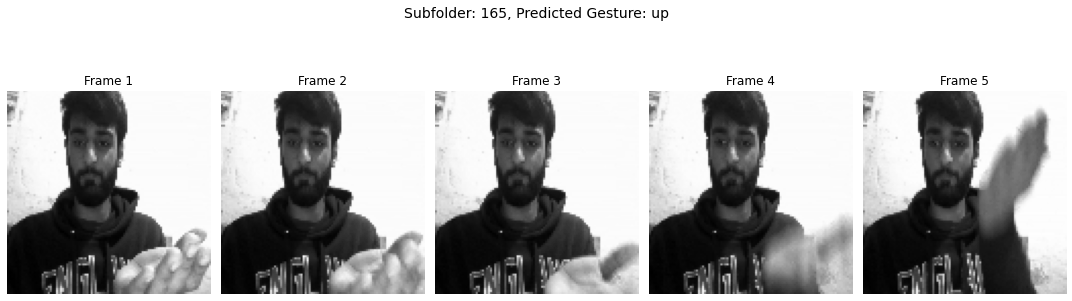

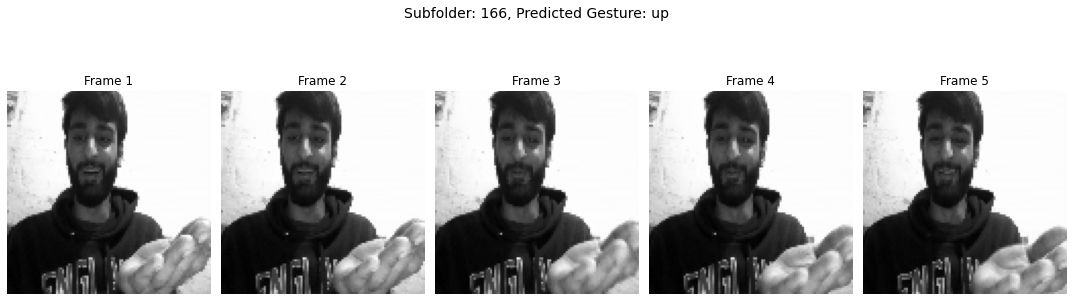

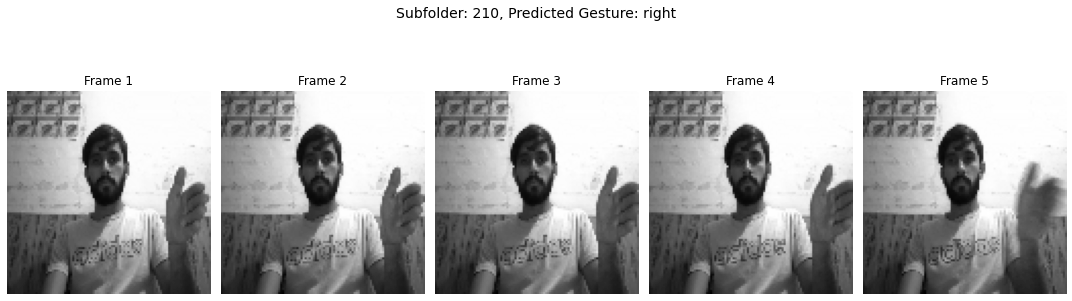

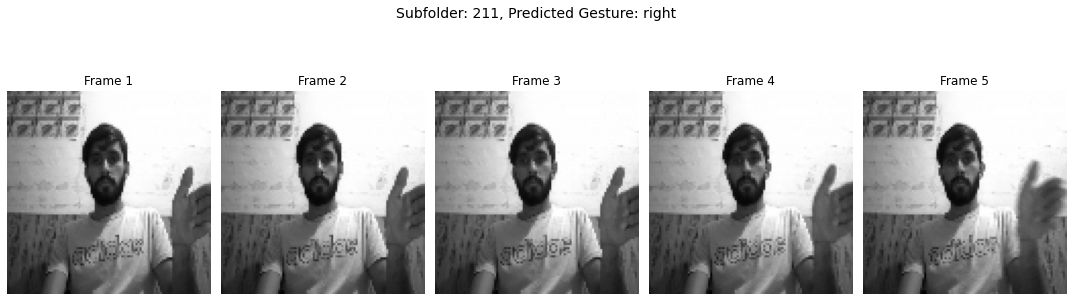

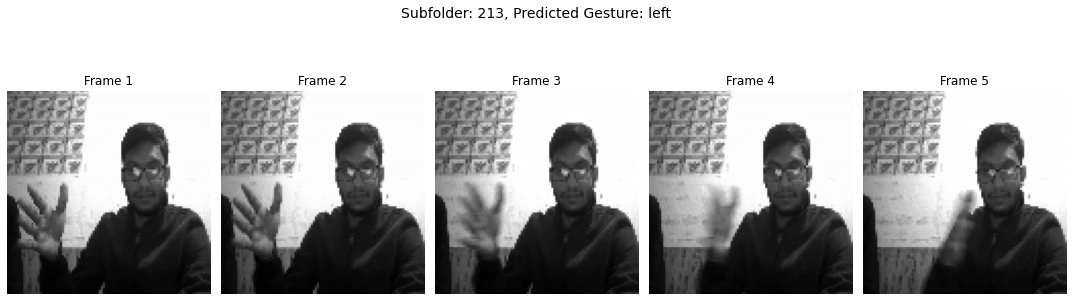

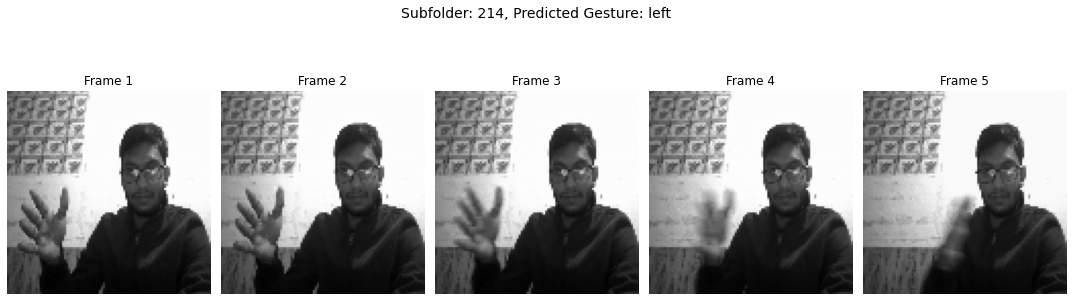

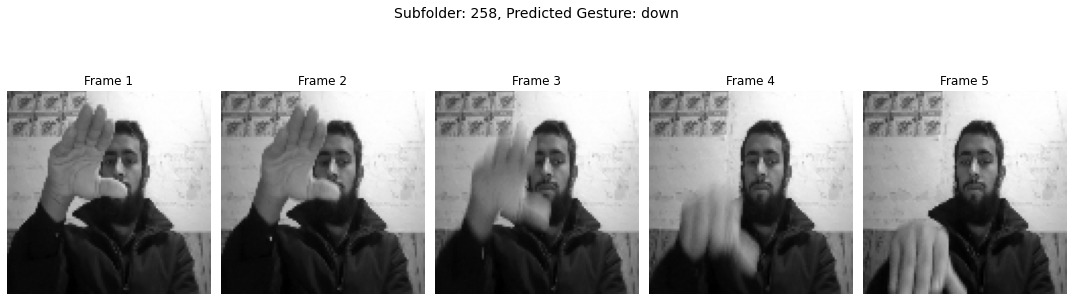

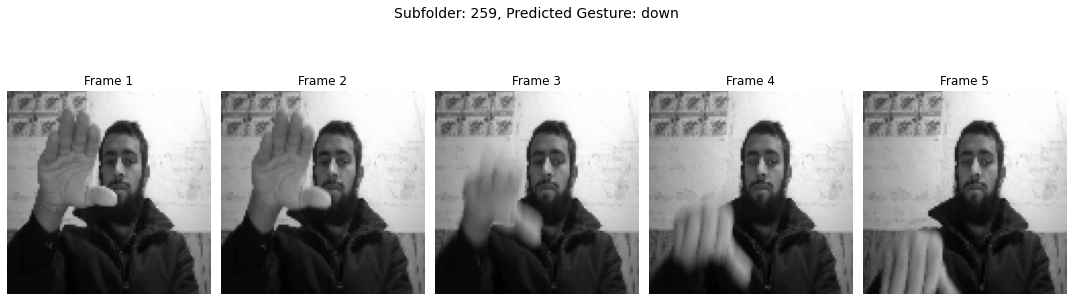

Subfolder: 165, Predicted Gesture: up
Subfolder: 166, Predicted Gesture: up
Subfolder: 210, Predicted Gesture: right
Subfolder: 211, Predicted Gesture: right
Subfolder: 213, Predicted Gesture: left
Subfolder: 214, Predicted Gesture: left
Subfolder: 258, Predicted Gesture: down
Subfolder: 259, Predicted Gesture: down


In [10]:
import matplotlib.pyplot as plt

# Function to predict gestures for multiple subfolders of frames and visualize frames with predictions
def predict_and_visualize_gestures(root_folder, model, input_shape, sequence_length, gesture_labels):
    import os
    import cv2
    import numpy as np

    predictions = {}

    # Iterate through subfolders in the root folder
    for subfolder in os.listdir(root_folder):
        subfolder_path = os.path.join(root_folder, subfolder)
        if not os.path.isdir(subfolder_path):
            continue

        # Load frames from the subfolder
        frames = []
        for img_file in sorted(os.listdir(subfolder_path))[:sequence_length]:
            img_path = os.path.join(subfolder_path, img_file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                print(f"Failed to load image: {img_path}")
                continue
            img = cv2.resize(img, input_shape)
            frames.append(img)

        # Pad if the number of frames is less than the sequence length
        if len(frames) < sequence_length:
            padding = [np.zeros(input_shape, dtype=np.uint8) for _ in range(sequence_length - len(frames))]
            frames.extend(padding)

        # Flatten and prepare for prediction
        flattened_frames = [frame.flatten() for frame in frames]
        feature_vector = np.concatenate(flattened_frames).reshape(1, -1)  # Shape: (1, sequence_length * flattened_image_size)

        # Predict the gesture
        prediction = model.predict(feature_vector)
        predicted_label = gesture_labels[prediction[0]]
        predictions[subfolder] = predicted_label

        # Visualize frames and prediction
        fig, axes = plt.subplots(1, min(len(frames), 5), figsize=(15, 5))  # Show up to 5 frames
        fig.suptitle(f"Subfolder: {subfolder}, Predicted Gesture: {predicted_label}", fontsize=14)
        for i, ax in enumerate(axes.flat):
            if i >= len(frames):
                break
            ax.imshow(frames[i], cmap='gray')
            ax.axis('off')
            ax.set_title(f"Frame {i+1}")
        plt.tight_layout()
        plt.show()

    return predictions

# Example usage
root_folder = r"D:\FYP\sample_sequence"  # Replace with the actual root folder path containing subfolders
predictions = predict_and_visualize_gestures(root_folder, svm_model, input_shape, sequence_length, gesture_folders)

# Print the predictions for each subfolder
for subfolder, predicted_gesture in predictions.items():
    print(f"Subfolder: {subfolder}, Predicted Gesture: {predicted_gesture}")
